<a href="https://colab.research.google.com/github/MatchLab-Imperial/machine-learning-course/blob/main/ML_non_linear_predictors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Non-linear Polynomial Transforms

## Classification

Previousely, you have experimented with the perceptron learning algorithm (PLA) which finds a solution with a training error of zero when applied to linearly seperable data. However, you found that some classes are not linearly separable. In such cases, non-linear transforms may be applied to the data to make the prediction task easier. This will be illustrated in this tutorial, where we will be using again the Iris dataset.

Reminder - the Iris flowers Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris - Versicolor, Virginica and Setosa.

The machine learning task in this exercise is to classify samples into different species. The code below implements a polynomial transformation of the original features.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets 
from ipywidgets import interact, interact_manual
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

C:\Users\aabuebay\Anaconda3\envs\backup\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


This code implements polynomial transformation of features.

\begin{equation}
z_i = c_i x_{i}^{d_i} + c_i x_{i}^{d_{i-1}}
\end{equation}
\begin{equation}
z = [z_1, z_2]
\end{equation}

Use the sliders below to choose 2 out of 4 available features, and tranform them with polynomial of degree $d$ and coefficient $c$.

By changing featuresx and featuresy you are chosing which of the four features are displayed on axis x and y. These original features are displayed in first figure.

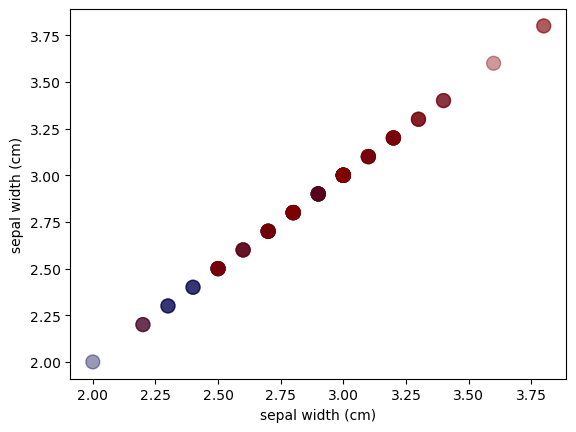

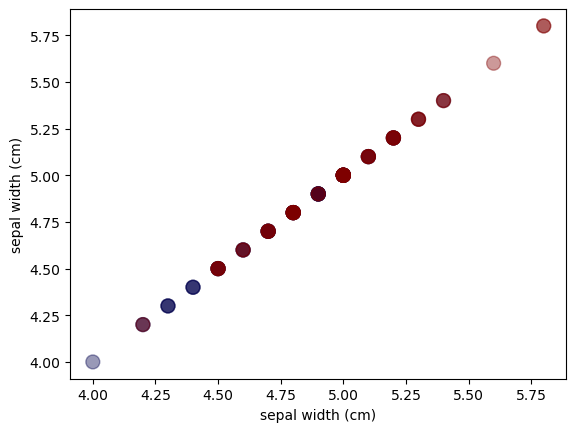

In [ ]:
from sklearn.datasets import load_iris

@interact

def plot_reg(featurex =  (0,3,1), featurey = (0,3,1), d = (-8,10,1),c =(-8,10,1)):
  iris = load_iris()
  features = iris.data.T

  plt.xlabel(iris.feature_names[featurex])
  plt.ylabel(iris.feature_names[featurey])
  plt.scatter(features[featurex][50:], features[featurey][50:], alpha=0.4,
              s=100, c=iris.target[50:], cmap='seismic')


  features[featurex] = c*features[featurex]**d + features[featurex]**(d-1)
  features[featurey] = c*features[featurey]**d + features[featurey]**(d-1)
  # plt.legend(iris.target_names)
  plt.figure()
  plt.scatter(features[featurex][50:], features[featurey][50:], alpha=0.4,
              s=100, c=iris.target[50:], cmap='seismic')
  plt.xlabel(iris.feature_names[featurex])
  plt.ylabel(iris.feature_names[featurey])
  # plt.legend(iris.target_names)

# Coursework

## Task 1: 

Combine the code above with the one from the Perceptron exercise to implement a linear classifier with pocket algorithm for features transformed with polynomial function. Use all 4 available features. Find the transformation that leads to the best classification results.

In your report:

- Report results for the best performance.
- Include model parameters, a figure with the training error vs iterations of the pocket algorithm and list 10 examples of misclassified data: 5 of false negatives, and 5 of false positives (only list features, you can include 1 with an image).

## Task 2: k-Fold Cross-Validation

Write a code to apply k-Fold Cross-Validation concept. Explore the effect of different $k$ values on the estimate of model performance and compare this to an ideal test condition, use $k =3$, $k = 5$, and $k = 10$.



## Regression

In this exercise you will experiment with a regression using non-linear polynomial transform of features. We will use the boston house-prices dataset again.

The figure below display the feature values on x axis and their transformed values on y axis in green. The labels i.e., outputs of the target function are displayed in blue, which is median value of owner-occupied homes in $1000’s.

The code below transforms the selected 1 out of 13 features with degree $d$ and coefficient $c$ according to

\begin{equation}
z_i = c_x x_{x}^{d_x} + c_{x_1} x_{x}^{d_{x-1}} + c_{x_2} x_{x}^{d_{x-2}}
\end{equation}

     Actual  Predicted
0      22.6  29.654675
1      50.0  18.401711
2      23.0  19.435081
3       8.3  18.945592
4      21.2  24.696618
..      ...        ...
97     24.7  27.143060
98     14.1  20.237289
99     18.7  22.997290
100    28.1  27.605007
101    19.8  18.796025

[102 rows x 2 columns]
Mean Absolute Error: 6.049806134914443
Mean Squared Error: 80.40098183717934
Root Mean Squared Error: 8.966659458080214


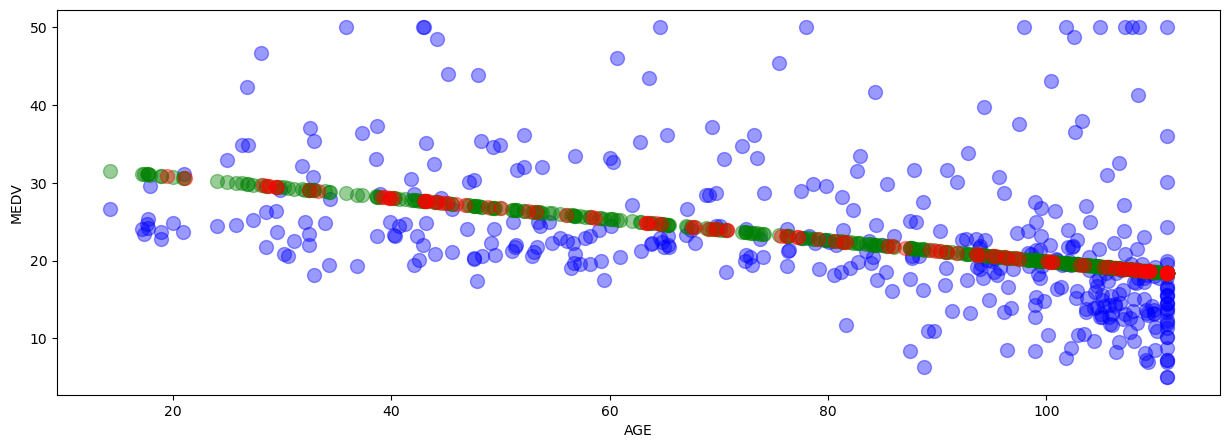

In [ ]:
import pandas as pd 
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import metrics
@interact

def plot_reg(featurex = (0,12,1),d_x = (-8,10,1),c_x_0 =(-8,10,0.1),c_x_1 =(-8,10,0.1),c_x_2 =(-8,10,0.1),bias =(-20,40,1)):
  boston = load_boston()
  features = boston.data.T
  ofeatures = features.copy()

  features[featurex] = c_x_0*features[featurex]**d_x + c_x_1*features[featurex]**(d_x-1)+c_x_2*features[featurex]**(d_x-2)+bias

  Z=features[featurex:(featurex+1)]
  ZT=np.transpose(Z)
  X_train, X_test, y_train, y_test = train_test_split(ZT, boston.target, test_size=0.2, random_state=0)
  lr = LinearRegression()
  lr.fit(X_train, y_train)
  y_tr_pred = lr.predict(X_train)
  y_te_pred = lr.predict(X_test)

  plt.figure(figsize = (15,5))
  plt.scatter(X_train, y_train, alpha=0.4,s=100, c='blue')
  #w = lr.coef_
  #b=lr.intercept_
  #plt.scatter(X_train, b+w*X_train,  alpha=0.4,s=100, c='red')
  plt.scatter(X_train, y_tr_pred,  alpha=0.4,s=100,c='green')
  plt.scatter(X_test, y_te_pred,  alpha=0.4,s=100,c='red')
  plt.xlabel(boston.feature_names[featurex])
  plt.ylabel('MEDV') 
  df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_te_pred.flatten()})
  print(df)
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_te_pred))  
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_te_pred))  
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_te_pred)))

# Coursework

## Task 3: 

Find 1 of the 13 features, its transformation with polynomial, degrees and coefficients that best approximate the target output. You can change the non-linear function in the code and range of values for the parameters. In your report:

- Report your formula, parameters, errors and figures in the coursework report.

## Task 4:

Modify the code above to make use of all 13 features simultaneously, their transformation with polynomials, degrees and coefficients that minimize the regression error. In your report:

- Report your formula, parameters, errors and figures in the coursework report.
